<a href="https://colab.research.google.com/github/Karemhl/Python_hlk/blob/main/Ejercicio_Nutriologos_hlk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20An%C3%A1lisis%20Estad%C3%ADstico/notebooks/exercises/Ejercicio_Nutriologos.ipynb)

# Descripción del Ejercicio de NUTRIOLOGOS

Este ejercicio tiene como objetivo simular y analizar datos relacionados con la salud y el estilo de vida de individuos, con el fin de explorar patrones, relaciones y posibles predictores de enfermedades crónicas. Se generan datos sintéticos utilizando distribuciones estadísticas y lógica programática para representar una amplia gama de características relevantes para la salud, como edad, peso, hábitos alimenticios, historial médico familiar, niveles de actividad física, entre otros.

In [59]:
import pandas as pd
import numpy as np

# Establecer la cantidad de datos a generar
cantidad_datos = 2000

El proceso comienza con la generación de datos simulados para una muestra de individuos, donde cada individuo está representado por múltiples características. Estas características incluyen medidas físicas como peso, altura, índice de masa corporal (IMC), circunferencia de cintura, así como información sobre estilo de vida, hábitos alimenticios, nivel de actividad física, niveles de estrés, consumo de alcohol y tabaco, entre otros.


In [106]:
# Definir funciones para generar datos simulados
# En mi estudio solo consideraré pacientes de 15 a 65 años
def generar_edad():
    return np.random.randint(15, 65, cantidad_datos)

def generar_peso(edad):
    # Para simular casos de obesidad en ciertas edades
    sobrepeso = np.random.choice([0, 1], cantidad_datos, p=[0.9, 0.1])  # 10% de casos de obesidad
    peso_base = np.random.normal(70, 15, cantidad_datos)  # Distribución normal con media de 70 kg y desviación estándar de 15 kg
    peso = peso_base + sobrepeso * 20  # Añadir 20 kg en caso de obesidad
    # Ajustar el peso basado en la edad
    peso = np.where((edad >= 40) & (edad <= 60), peso + 5, peso)  # Añadir 5 kg para edades entre 40 y 60
    return peso

def generar_altura():
    # Distribución normal con media de 170 cm y desviación estándar de 10 cm
    return np.random.normal(170, 10, cantidad_datos)

def calcular_imc(peso, altura):
    # Fórmula del Índice de Masa Corporal (IMC): peso (kg) / altura (m)^2
    return peso / ((altura/100) ** 2)

def generar_circunferencia_cintura():
    # Distribución normal con media de 90 cm y desviación estándar de 10 cm
    return np.random.normal(90, 10, cantidad_datos)

def generar_circunferencia_cadera():
    # Distribución normal con media de 100 cm y desviación estándar de 10 cm
    return np.random.normal(100, 10, cantidad_datos)

def generar_porcentaje_grasa_corporal():
    # Distribución normal con media de 25% y desviación estándar de 5%
    return np.random.normal(25, 5, cantidad_datos)

def generar_historial_medico_familiar():
    # Simulación de historial médico familiar
    enfermedades = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares']
    return [', '.join(np.random.choice(enfermedades, np.random.randint(0, len(enfermedades)), replace=False)) for _ in range(cantidad_datos)]

def generar_nivel_actividad_fisica():
    return np.random.choice(['Sedentario', 'Ligero', 'Moderado', 'Intenso'], cantidad_datos)

def generar_habitos_alimenticios():
    habitos = ['Vegetariano', 'Omnívoro', 'Vegano', 'Pescetariano', 'Keto', 'Paleo']
    return np.random.choice(habitos, cantidad_datos)

def generar_horas_sueño_noche():
    # Distribución normal con media de 7 horas y desviación estándar de 2 hora
    return np.random.normal(7, 2, cantidad_datos)

def generar_nivel_estres_percibido():
    return np.random.randint(1, 11, cantidad_datos)

def generar_consumo_agua_diario():
    # Distribución normal con media de 2 litros y desviación estándar de 0.5 litros
    return np.random.normal(2, 0.5, cantidad_datos)

def generar_consumo_alcohol():
    # Distribución normal con media de 5 unidades por semana y desviación estándar de 3 unidades por semana
    return np.random.normal(5, 3, cantidad_datos)

def generar_consumo_tabaco():
    # Distribución normal con media de 5 cigarrillos por día y desviación estándar de 2 cigarrillos por día
    return np.random.normal(5, 2, cantidad_datos)

def generar_consumo_cafeina():
    # Distribución normal con media de 200 mg por día y desviación estándar de 100 mg por día
    return np.random.normal(200, 100, cantidad_datos)

def generar_enfermedades_cronicas():
    enfermedades = ['Diabetes', 'Hipertensión', 'Cáncer', 'Enfermedades cardiovasculares', 'Enfermedad renal crónica', 'Enfermedad pulmonar crónica']
    return [', '.join(np.random.choice(enfermedades, np.random.randint(0, len(enfermedades)), replace=False)) for _ in range(cantidad_datos)]

def generar_tipos_diabetes():
    enfermedad_tipo = ['0.0', '0.5', '1.0', '2.0', '3.0']
    return [', '.join(np.random.choice(enfermedad_tipo, np.random.randint(0, len(enfermedad_tipo)), replace=False)) for _ in range(cantidad_datos)]

def generar_medicamentos_actuales():
    medicamentos = ['Aspirina', 'Insulina', 'Losartán', 'Atorvastatina', 'Metformina', 'Omeprazol', 'Salbutamol']
    dosis = ['10 mg', '50 mg', '100 mg', '20 mg', '200 UI', '500 mg', '1 tableta']
    return ['{}, {}'.format(np.random.choice(medicamentos), np.random.choice(dosis)) for _ in range(cantidad_datos)]

def generar_metas_perdida_peso():
    # Distribución normal con media de 5 kg y desviación estándar de 3 kg
    return np.random.normal(5, 3, cantidad_datos)

def generar_frecuencia_cardiaca_reposo():
    # Distribución normal con media de 70 latidos por minuto y desviación estándar de 10 latidos por minuto
    return np.random.normal(70, 10, cantidad_datos)

def generar_presion_arterial_sistolica():
    # Distribución normal con media de 120 mmHg y desviación estándar de 10 mmHg
    return np.random.normal(120, 10, cantidad_datos)

def generar_presion_arterial_diastolica():
    # Distribución normal con media de 80 mmHg y desviación estándar de 8 mmHg
    return np.random.normal(80, 8, cantidad_datos)

def generar_niveles_colesterol():
    ldl = np.random.normal(100, 20, cantidad_datos)  # LDL: media de 100 mg/dL, desviación estándar de 20 mg/dL
    hdl = np.random.normal(50, 10, cantidad_datos)  # HDL: media de 50 mg/dL, desviación estándar de 10 mg/dL
    trigliceridos = np.random.normal(150, 30, cantidad_datos)  # Triglicéridos: media de 150 mg/dL, desviación estándar de 30 mg/dL
    return ldl, hdl, trigliceridos

def generar_niveles_glucosa_sangre():
    ayunas = np.random.normal(90, 10, cantidad_datos)  # Niveles de glucosa en ayunas: media de 90 mg/dL, desviación estándar de 10 mg/dL
    postprandial = np.random.normal(120, 20, cantidad_datos)  # Niveles de glucosa postprandial: media de 120 mg/dL, desviación estándar de 20 mg/dL
    return ayunas, postprandial

def generar_sensibilidad_alimentos():
    alimentos = ['Lactosa', 'Gluten', 'Nueces', 'Mariscos', 'Huevo', 'Soja']
    return [', '.join(np.random.choice(alimentos, np.random.randint(0, len(alimentos)), replace=False)) for _ in range(cantidad_datos)]

def generar_nivel_satisfaccion_dieta_actual():
    return np.random.randint(1, 11, cantidad_datos)

def generar_cumplimiento_plan_nutricional():
    return np.random.randint(1, 11, cantidad_datos)

def generar_actividades_fisicas_realizadas():
    actividades = ['Caminar', 'Correr', 'Nadar', 'Bailar', 'Levantamiento de pesas', 'Yoga','Nulo']
    return [', '.join(np.random.choice(actividades, np.random.randint(1, 4), replace=False)) for _ in range(cantidad_datos)]

def generar_consumo_frutas_verduras():
    # Distribución normal con media de 5 porciones por día y desviación estándar de 2 porciones por día
    return np.random.normal(5, 2, cantidad_datos)

def generar_nivel_conocimiento_nutricion():
    return np.random.choice(['Bajo', 'Medio', 'Alto'], cantidad_datos)

In [96]:
# Generar datos simulados
# Mandamos a llamar a todas las funciones ya definidas
edades = generar_edad()
peso = generar_peso(edades)
altura = generar_altura()
circunferencia_cintura = generar_circunferencia_cintura()
circunferencia_cadera = generar_circunferencia_cadera()
porcentaje_grasa_corporal = generar_porcentaje_grasa_corporal()
historial_medico_familiar = generar_historial_medico_familiar()
nivel_actividad_fisica = generar_nivel_actividad_fisica()
habitos_alimenticios = generar_habitos_alimenticios()
horas_sueño_noche = generar_horas_sueño_noche()
nivel_estres_percibido = generar_nivel_estres_percibido()
consumo_agua_diario = generar_consumo_agua_diario()
consumo_alcohol = generar_consumo_alcohol()
consumo_tabaco = generar_consumo_tabaco()
consumo_cafeina = generar_consumo_cafeina()
enfermedades_cronicas = generar_enfermedades_cronicas()
diabetes_tipo = generar_tipos_diabetes()
medicamentos_actuales = generar_medicamentos_actuales()
metas_perdida_peso = generar_metas_perdida_peso()
frecuencia_cardiaca_reposo = generar_frecuencia_cardiaca_reposo()
presion_arterial_sistolica = generar_presion_arterial_sistolica()
presion_arterial_diastolica = generar_presion_arterial_diastolica()
ldl, hdl, trigliceridos = generar_niveles_colesterol()
ayunas, postprandial = generar_niveles_glucosa_sangre()
sensibilidad_alimentos = generar_sensibilidad_alimentos()
nivel_satisfaccion_dieta_actual = generar_nivel_satisfaccion_dieta_actual()
cumplimiento_plan_nutricional = generar_cumplimiento_plan_nutricional()
actividades_fisicas_realizadas = generar_actividades_fisicas_realizadas()
consumo_frutas_verduras = generar_consumo_frutas_verduras()
nivel_conocimiento_nutricion = generar_nivel_conocimiento_nutricion()

# Creamos un diccionario con los datos generados
data = {
    'Edad': edades,
    'Peso': peso,
    'Altura': altura,
    'IMC': calcular_imc(peso, altura),
    'Circunferencia de cintura': circunferencia_cintura,
    'Circunferencia de cadera': circunferencia_cadera,
    'Porcentaje de grasa corporal': porcentaje_grasa_corporal,
    'Historial médico familiar': historial_medico_familiar,
    'Nivel de actividad física': nivel_actividad_fisica,
    'Hábitos alimenticios': habitos_alimenticios,
    'Horas de sueño por noche': horas_sueño_noche,
    'Nivel de estrés percibido': nivel_estres_percibido,
    'Consumo de agua diario': consumo_agua_diario,
    'Consumo de alcohol': consumo_alcohol,
    'Consumo de tabaco': consumo_tabaco,
    'Consumo de cafeína': consumo_cafeina,
    'Enfermedades crónicas': enfermedades_cronicas,
    'Diabetes tipos': diabetes_tipo,
    'Medicamentos actuales': medicamentos_actuales,
    'Metas de pérdida de peso': metas_perdida_peso,
    'Frecuencia cardíaca en reposo': frecuencia_cardiaca_reposo,
    'Presión arterial sistólica': presion_arterial_sistolica,
    'Presión arterial diastólica': presion_arterial_diastolica,
    'Niveles de colesterol (LDL)': ldl,
    'Niveles de colesterol (HDL)': hdl,
    'Niveles de colesterol (Triglicéridos)': trigliceridos,
    'Niveles de glucosa en sangre (Ayunas)': ayunas,
    'Niveles de glucosa en sangre (Postprandial)': postprandial,
    'Sensibilidad a ciertos alimentos': sensibilidad_alimentos,
    'Nivel de satisfacción con la dieta actual': nivel_satisfaccion_dieta_actual,
    'Cumplimiento con el plan nutricional': cumplimiento_plan_nutricional,
    'Actividades físicas realizadas': actividades_fisicas_realizadas,
    'Consumo de frutas y verduras': consumo_frutas_verduras,
    'Nivel de conocimiento sobre nutrición': nivel_conocimiento_nutricion
}

# Crear un DataFrame de Pandas
df = pd.DataFrame(data)

# Verificar y corregir valores nulos o inconsistentes
# for columna in df.columns:
#     print(f"Longitud de {columna}: {len(df[columna])}")

# Manejar valores nulos imputándoles NaN
# longitud_maxima = max(len(df[columna]) for columna in df.columns)
# for columna in df.columns:
#     if len(df[columna]) < longitud_maxima:
#         df[columna] = df[columna].append(pd.Series([np.nan] * (longitud_maxima - len(df[columna]))), ignore_index=True)

# Verificar nuevamente las longitudes después de imputar NaN
# print("\nDespués de imputar NaN:\n")
# for columna in df.columns:
#     print(f"Longitud de {columna}: {len(df[columna])}")

# Separar el DataFrame en dos basado en la lógica de los datos
datos_con_logica_real = df[['Niveles de colesterol (LDL)', 'Niveles de colesterol (HDL)', 'Niveles de colesterol (Triglicéridos)',
                            'Niveles de glucosa en sangre (Ayunas)', 'Niveles de glucosa en sangre (Postprandial)']]
datos_aleatorios = df.drop(columns=['Niveles de colesterol (LDL)', 'Niveles de colesterol (HDL)', 'Niveles de colesterol (Triglicéridos)',
                                     'Niveles de glucosa en sangre (Ayunas)', 'Niveles de glucosa en sangre (Postprandial)'])

# Explicar los DataFrames resultantes
print("\nDataFrame con lógica real:\n")
print(datos_con_logica_real.head())

print("\nDataFrame con datos aleatorios:\n")
print(datos_aleatorios.head())


DataFrame con lógica real:

   Niveles de colesterol (LDL)  Niveles de colesterol (HDL)  \
0                    93.724661                    37.257817   
1                    71.724337                    54.798787   
2                   120.128705                    40.511581   
3                   101.903688                    54.100021   
4                    98.399754                    53.392757   

   Niveles de colesterol (Triglicéridos)  \
0                             166.975719   
1                             125.357353   
2                             177.839432   
3                             180.005470   
4                             155.661920   

   Niveles de glucosa en sangre (Ayunas)  \
0                              68.479426   
1                              97.618119   
2                              95.686893   
3                              83.751973   
4                              80.525441   

   Niveles de glucosa en sangre (Postprandial)  
0            

## Exploración de datos:

### Ejemplo 1: Histograma de distribución de peso

In [97]:
# Primero vemos que todo vaya bien:
df.head(3)

,Edad,Peso,Altura,IMC,Circunferencia de cintura,Circunferencia de cadera,Porcentaje de grasa corporal,Historial médico familiar,Nivel de actividad física,Hábitos alimenticios,...,Niveles de colesterol (HDL),Niveles de colesterol (Triglicéridos),Niveles de glucosa en sangre (Ayunas),Niveles de glucosa en sangre (Postprandial),Sensibilidad a ciertos alimentos,Nivel de satisfacción con la dieta actual,Cumplimiento con el plan nutricional,Actividades físicas realizadas,Consumo de frutas y verduras,Nivel de conocimiento sobre nutrición
0,35,76.226174,165.107902,27.962011,86.992079,115.689598,21.544477,,Intenso,Vegano,...,37.257817,166.975719,68.479426,109.353738,,3,8,"Correr, Nulo",5.954836,Bajo
1,39,66.179620,180.620929,20.285613,91.384071,81.303573,19.966723,"Cáncer, Enfermedades cardiovasculares",Moderado,Vegetariano,...,54.798787,125.357353,97.618119,74.282395,"Lactosa, Mariscos",3,2,Bailar,6.010237,Alto
2,40,82.455952,165.296489,30.178299,80.264123,96.363361,27.361503,"Cáncer, Hipertensión, Enfermedades cardiovascu...",Sedentario,Vegano,...,40.511581,177.839432,95.686893,143.786430,"Soja, Huevo",2,9,Bailar,6.471272,Alto


Text(0, 0.5, 'Frecuencia')

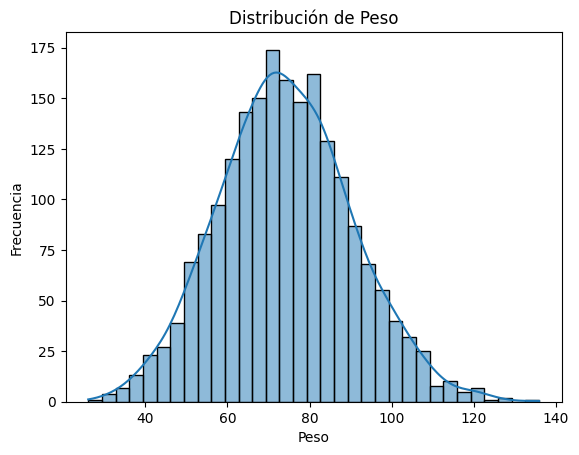

In [98]:
# Importamos seaborn para hacer los gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de distribución de peso:
plt.figure()
sns.histplot(df['Peso'], kde=True).set_title("Distribución de Peso")
plt.ylabel('Frecuencia')

### Ejemplo 2: Diagrama de dispersión entre IMC y edad


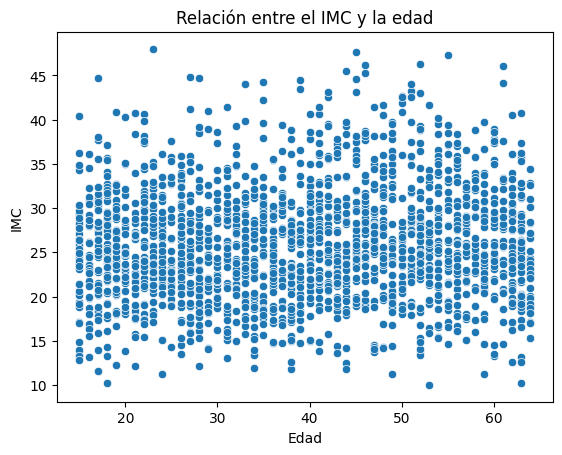

In [99]:
# Diagrama entre el IMC y la edad
sns.scatterplot(x='Edad', y='IMC', data=df)
plt.title('Relación entre el IMC y la edad')
plt.xlabel('Edad')
plt.ylabel('IMC')
plt.show()


Ejemplo 3: Relación de la edad con el nivel de estrés percibido.

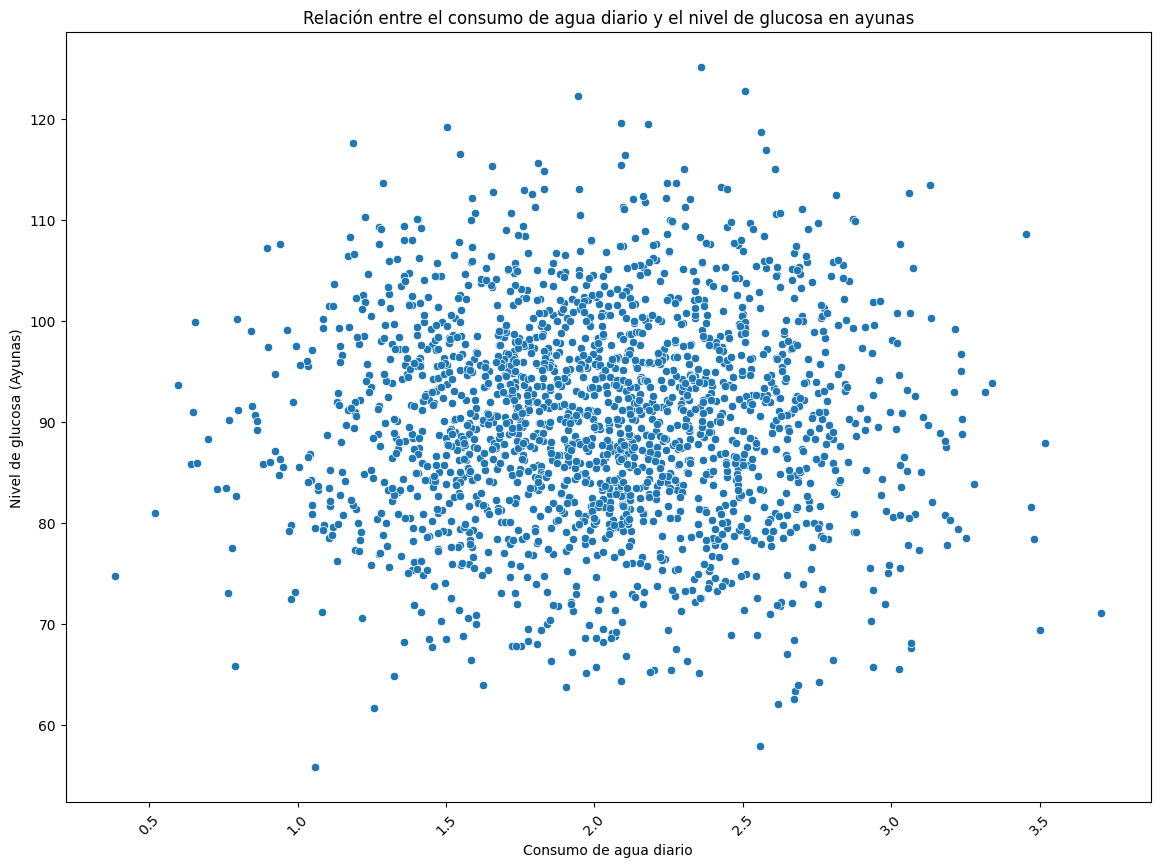

In [124]:
# Histograma entre el consumo de agua

plt.figure(figsize=(14, 10))
sns.scatterplot(y='Niveles de glucosa en sangre (Ayunas)', x='Consumo de agua diario', data=df)
plt.title('Relación entre el consumo de agua diario y el nivel de glucosa en ayunas')
plt.ylabel('Nivel de glucosa (Ayunas)')
plt.xticks(rotation=45)
plt.xlabel('Consumo de agua diario')
plt.show()

Ejempo 4: Relación de parámetros relacionados con la diabétes por edades:
1. Niveles de glucosa en sangre (Ayunas)
2. Niveles de glucosa en sangre (Postprandial)
3. Consumo de agua diario

Text(0.5, 1.0, 'Glucosa en la sangre (Ayunas)')

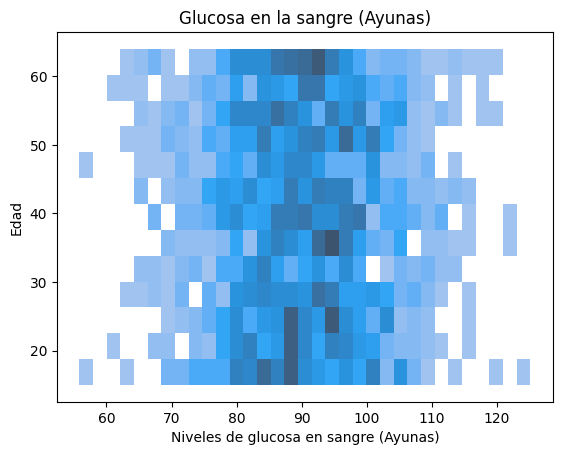

In [120]:
# Histograma nivel de glucosa en sangre (ayunas)
plt.figure()
sns.histplot(y = df['Edad'], x = df['Niveles de glucosa en sangre (Ayunas)'], kde=True).set_title("Glucosa en la sangre (Ayunas)")


Text(0.5, 1.0, 'Glucosa en la sangre Postprandial')

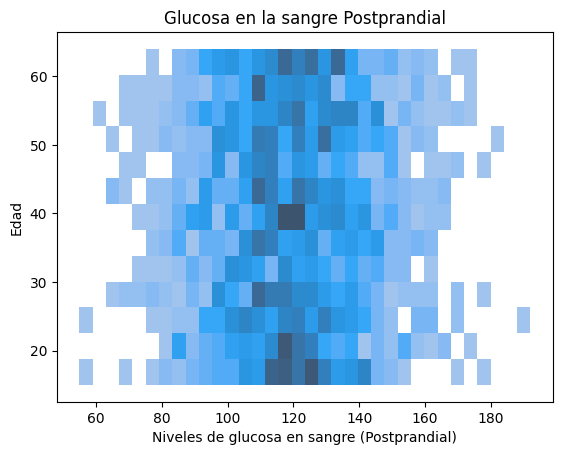

In [121]:
# Histograma nivel de glucosa en sangre (Postprandial)
plt.figure()
sns.histplot(y = df['Edad'], x = df['Niveles de glucosa en sangre (Postprandial)'], kde=True).set_title("Glucosa en la sangre Postprandial")

Text(0.5, 1.0, 'Consumo de agua diario')

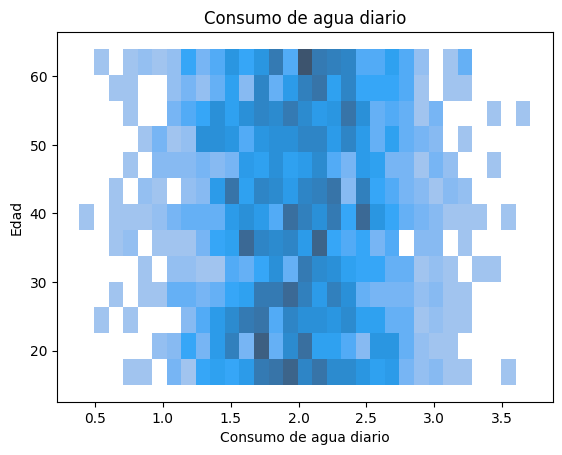

In [103]:
# Histograma cantidad de agua tomada
plt.figure()
sns.histplot(y = df['Edad'], x = df['Consumo de agua diario'], kde=True).set_title("Consumo de agua diario")

##  Creación de una Aplicación de Predicción de Enfermedades Crónicas con Streamlit

En esta sección, presentamos un código base que los estudiantes del diplomado pueden utilizar como referencia para crear una aplicación interactiva utilizando Streamlit. El código base emplea un clasificador de Bosque Aleatorio (Random Forest Classifier) para predecir la probabilidad de padecer enfermedades crónicas.

Los estudiantes del diplomado tienen la tarea de seleccionar las variables del conjunto de datos proporcionado, basándose en un análisis previo. Estas variables se utilizarán como características (features) para entrenar el modelo de clasificación. Luego, podrán personalizar la interfaz de usuario de la aplicación y la lógica del modelo según sus necesidades específicas, creando así su propia aplicación de predicción de enfermedades crónicas.

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Haremos un modelo para poder predecir la tendencia a desarrollar diabétes

# Paso 1. Dividir los datos en conjunto de características (X) y variable objetivo (y)
X = df.drop(['Niveles de glucosa en sangre (Ayunas)'], axis=1)
y = df['Niveles de glucosa en sangre (Ayunas)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manejar los datos faltantes ('')
X_train.replace('', np.nan, inplace=True)
X_test.replace('', np.nan, inplace=True)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Codificar las variables categóricas
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Ajustar y transformar las columnas categóricas de entrenamiento
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Transformar las columnas categóricas de prueba
X_test_encoded = encoder.transform(X_test[categorical_features])

# Imputar valores faltantes en las columnas numéricas
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train[numeric_features])
X_test_imputed = imputer.transform(X_test[numeric_features])

# Concatenar las columnas numéricas y las codificadas
X_train_final = np.hstack((X_train_imputed, X_train_encoded))
X_test_final = np.hstack((X_test_imputed, X_test_encoded))

# Entrenar el modelo de Bosques Aleatorios con los datos finales
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train)

# Evaluar el modelo
y_pred_train = rf_model.predict(X_train_final)
y_pred_test = rf_model.predict(X_test_final)

# Calcular el error cuadrático medio y el coeficiente de determinación (R^2)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Error cuadrático medio (del entrenamiento):", train_mse)
print("Error cuadrático medio (de la prueba):", test_mse)
print("Coeficiente de determinación (R^2):", r2)

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Mostrar las 5 características más importantes
print("\nLas 5 características más importantes:")
for i in range(5):
    print(f"{i+1}. {X.columns[indices[i]]}: {feature_importances[indices[i]]}")

# Realizar una predicción para un nuevo conjunto de datos (opcional)
# (Aquí deberías reemplazar este bloque de código con tus datos de predicción)
# new_data = ...
# new_data_encoded = pd.get_dummies(new_data, columns=categorical_cols)
# predicted_probs = rf_classifier.predict_proba(new_data_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Error cuadrático medio (del entrenamiento): 14.897252443021694
Error cuadrático medio (de la prueba): 119.06687542545912
Coeficiente de determinación (R^2): -0.048585419117831874

Las 5 características más importantes:
1. Frecuencia cardíaca en reposo: 0.04775085750962274
2. Altura: 0.040744811549114246
3. Circunferencia de cadera: 0.03847190054452689
4. Circunferencia de cintura: 0.038395590968800984
5. Historial médico familiar: 0.03792668708872702


In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Haremos un modelo para poder predecir la tendencia a desarrollar diabétes

# Paso 1. Dividir los datos en conjunto de características (X) y variable objetivo (y)
X = df.drop(['Niveles de glucosa en sangre (Postprandial)'], axis=1)
y = df['Niveles de glucosa en sangre (Postprandial)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manejar los datos faltantes ('')
X_train.replace('', np.nan, inplace=True)
X_test.replace('', np.nan, inplace=True)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Codificar las variables categóricas
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Ajustar y transformar las columnas categóricas de entrenamiento
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Transformar las columnas categóricas de prueba
X_test_encoded = encoder.transform(X_test[categorical_features])

# Imputar valores faltantes en las columnas numéricas
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train[numeric_features])
X_test_imputed = imputer.transform(X_test[numeric_features])

# Concatenar las columnas numéricas y las codificadas
X_train_final = np.hstack((X_train_imputed, X_train_encoded))
X_test_final = np.hstack((X_test_imputed, X_test_encoded))

# Entrenar el modelo de Bosques Aleatorios con los datos finales
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train)

# Evaluar el modelo
y_pred_train = rf_model.predict(X_train_final)
y_pred_test = rf_model.predict(X_test_final)

# Calcular el error cuadrático medio y el coeficiente de determinación (R^2)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Error cuadrático medio (del entrenamiento):", train_mse)
print("Error cuadrático medio (de la prueba):", test_mse)
print("Coeficiente de determinación (R^2):", r2)

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Mostrar las 5 características más importantes
print("\nLas 5 características más importantes:")
for i in range(5):
    print(f"{i+1}. {X.columns[indices[i]]}: {feature_importances[indices[i]]}")



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Error cuadrático medio (del entrenamiento): 58.69241023333163
Error cuadrático medio (de la prueba): 355.8855910348237
Coeficiente de determinación (R^2): -0.028199084258927476

Las 5 características más importantes:
1. Niveles de colesterol (LDL): 0.04156057667268993
2. Circunferencia de cintura: 0.03961014514485462
3. Consumo de tabaco: 0.03733485482797581
4. Consumo de cafeína: 0.035358353985773985
5. Frecuencia cardíaca en reposo: 0.03512224801569416


In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Haremos un modelo para poder predecir la tendencia a desarrollar diabétes

# Paso 1. Dividir los datos en conjunto de características (X) y variable objetivo (y)
X = df.drop(['Consumo de agua diario'], axis=1)
y = df['Consumo de agua diario']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manejar los datos faltantes ('')
X_train.replace('', np.nan, inplace=True)
X_test.replace('', np.nan, inplace=True)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Codificar las variables categóricas
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Ajustar y transformar las columnas categóricas de entrenamiento
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Transformar las columnas categóricas de prueba
X_test_encoded = encoder.transform(X_test[categorical_features])

# Imputar valores faltantes en las columnas numéricas
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train[numeric_features])
X_test_imputed = imputer.transform(X_test[numeric_features])

# Concatenar las columnas numéricas y las codificadas
X_train_final = np.hstack((X_train_imputed, X_train_encoded))
X_test_final = np.hstack((X_test_imputed, X_test_encoded))

# Entrenar el modelo de Bosques Aleatorios con los datos finales
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train)

# Evaluar el modelo
y_pred_train = rf_model.predict(X_train_final)
y_pred_test = rf_model.predict(X_test_final)

# Calcular el error cuadrático medio y el coeficiente de determinación (R^2)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Error cuadrático medio (del entrenamiento):", train_mse)
print("Error cuadrático medio (de la prueba):", test_mse)
print("Coeficiente de determinación (R^2):", r2)

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Mostrar las 5 características más importantes
print("\nLas 5 características más importantes:")
for i in range(5):
    print(f"{i+1}. {X.columns[indices[i]]}: {feature_importances[indices[i]]}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Error cuadrático medio (del entrenamiento): 0.03774086769377132
Error cuadrático medio (de la prueba): 0.2381700104082691
Coeficiente de determinación (R^2): -0.019983521617507938

Las 5 características más importantes:
1. Consumo de tabaco: 0.04156523301387942
2. Porcentaje de grasa corporal: 0.04076741126589433
3. Consumo de cafeína: 0.039661356445546594
4. Circunferencia de cadera: 0.03928211250437955
5. Circunferencia de cintura: 0.038661183070513826
